# 주제: 다음 분기에 어떤 게임을 설계해야 할까요?
1.지역에 따라서 선호하는 게임 장르가 다를까?

2.연도별 게임의 트렌드가 있을까?

3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함?


-------------------------------------------------------------------------------



Data Description

Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 제작한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.


In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data='/content/vgames2.csv'
df =pd.read_csv(data)
 
df.fillna(0, inplace=True) 
df = df.drop(columns=['Unnamed: 0'], axis=1)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df['NA_Sales']= df['NA_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['EU_Sales']= df['EU_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['JP_Sales']= df['JP_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
df['Other_Sales']=df['Other_Sales'].replace({'[K]': '*0.001', '[M]': '*1'}, regex=True).map(pd.eval).astype(float)
#NA,EU,JP,Other지역의 데이터타입 변경 
df = df.dropna(axis=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16598 non-null  float64
 3   Genre        16598 non-null  object 
 4   Publisher    16598 non-null  object 
 5   NA_Sales     16598 non-null  float64
 6   EU_Sales     16598 non-null  float64
 7   JP_Sales     16598 non-null  float64
 8   Other_Sales  16598 non-null  float64
dtypes: float64(5), object(4)
memory usage: 1.3+ MB


In [ ]:
print(df.columns)

df

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df0=df.groupby('Genre')['NA_Sales'].sum()
df1=df.groupby('Genre')['EU_Sales'].sum()
df2=df.groupby('Genre')['JP_Sales'].sum()
df3=df.groupby('Genre')['Other_Sales'].sum()

result0 = pd.concat([df0,df1,df2,df3],axis=1)
result0= result0.drop(0) #장르명 0으로 나오는것 drop 
result0

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,874.81,522.16,157.90,186.45
Adventure,105.66,64.05,51.95,16.81
Fighting,223.20,101.22,87.34,36.64
Misc,408.05,212.36,105.27,74.04
Platform,446.44,201.61,130.65,51.53
Puzzle,123.35,50.73,56.87,12.52
Racing,357.19,237.10,56.40,77.10
Role-Playing,319.54,183.58,344.95,56.96
Shooter,581.92,313.05,38.28,102.65


In [ ]:
#귀무가설:지역에 따라서 선호하는 게임 장르가 다르다
#대안가설:지역에 따라서 선호하는 게임 장르가 다르지 않다.


In [ ]:
from scipy.stats import f_oneway
df1=df.groupby(df['Genre']).sum()
f_oneway(df1['NA_Sales'], df1['JP_Sales'], df1['EU_Sales'], df1['Other_Sales'])

df1

a=list(f_oneway(df1['NA_Sales'], df1['JP_Sales'], df1['EU_Sales'], df1['Other_Sales']))


#귀무가설 : 지역마다 장르에 따른 판매량의 차이가 없다.
#대립가설 : 지역마다 장르에 따른 판매량의 차이가 있다.

print(
   'P-values:',a[1], ',P-values 값이 유의수준인 0.05보다 작아 지역마다 장르에 따른 판매량의 차이가 있다고 볼 수 있다.')

P-values: 0.00020204407464599562 ,P-values 값이 유의수준인 0.05보다 작아 지역마다 장르에 따른 판매량의 차이가 있다고 볼 수 있다.


t-test를 통하여 지역에 따라서 선호하는 게임의 장르가 다르다는 것을 알 수 있었다. 비전공자에게 t-test에 대해 설명함에 있어 눈에 띄도록 시각화를 하여 보여준다면 이해도가 높아질 것이라고 생각하였다. 

In [ ]:
result0 = result0.reset_index ()
result0

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,874.81,522.16,157.90,186.45
1,Adventure,105.66,64.05,51.95,16.81
2,Fighting,223.20,101.22,87.34,36.64
3,Misc,408.05,212.36,105.27,74.04
4,Platform,446.44,201.61,130.65,51.53
5,Puzzle,123.35,50.73,56.87,12.52
6,Racing,357.19,237.10,56.40,77.10
7,Role-Playing,319.54,183.58,344.95,56.96
8,Shooter,581.92,313.05,38.28,102.65
9,Simulation,182.96,113.35,63.70,31.48


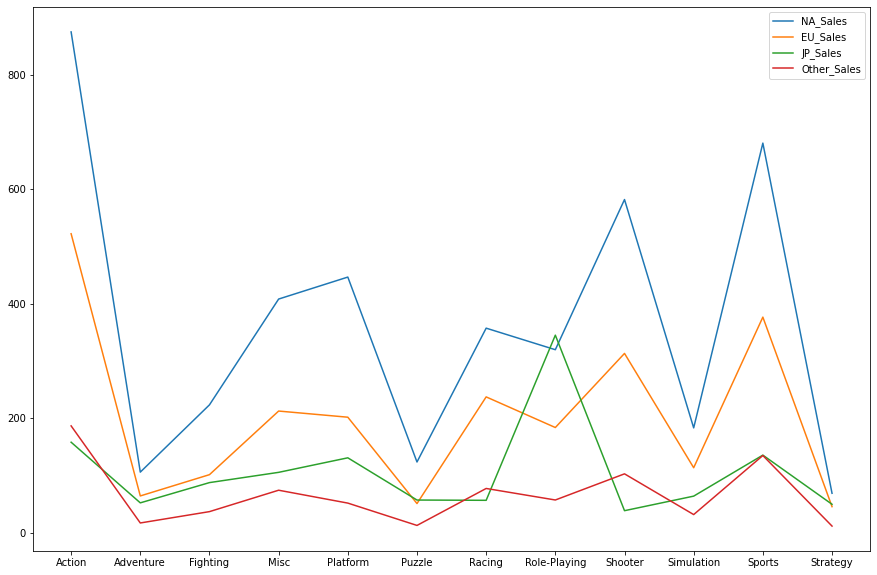

In [ ]:
Genre=result0['Genre']
Na=result0['NA_Sales']
EU=result0['EU_Sales']
JP=result0['JP_Sales']
Other=result0['Other_Sales']

plt.figure(figsize=(15,10))
plt.plot(Genre, Na,label="NA_Sales") 
plt.plot(Genre, EU, label="EU_Sales")
plt.plot(Genre, JP, label="JP_Sales")
plt.plot(Genre, Other, label="Other_Sales")
plt.legend()

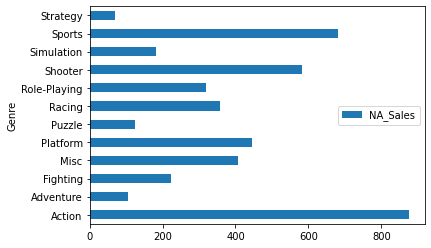

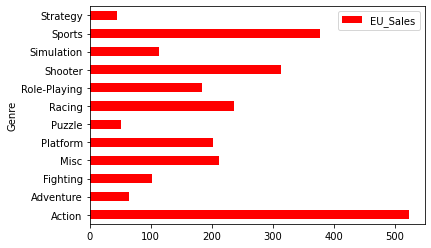

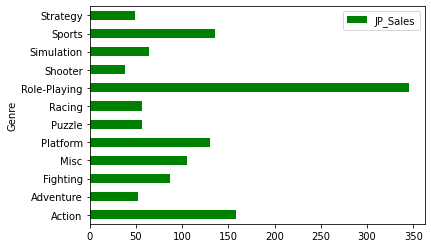

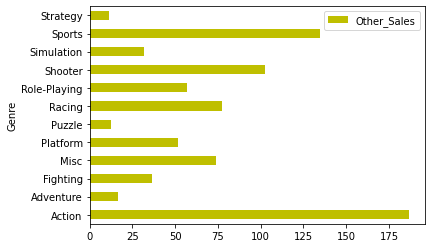

In [ ]:
result0.plot.barh(x= 'Genre', y= 'NA_Sales')
result0.plot.barh(x= 'Genre', y= 'EU_Sales',color='r')
result0.plot.barh(x= 'Genre', y= 'JP_Sales',color='g')
result0.plot.barh(x= 'Genre', y= 'Other_Sales',color='y')

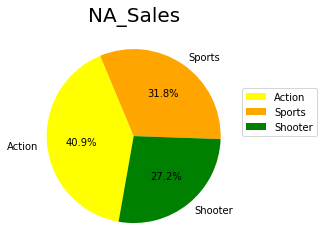

In [ ]:

Natop3=result0.nlargest(3,['NA_Sales'])
EUtop3=result0.nlargest(3,['EU_Sales'])
JPtop3=result0.nlargest(3,['JP_Sales'])	
Othertop3=result0.nlargest(3,['Other_Sales'])


Natop3= Natop3.reset_index ()
#print(Natop3)
#파이차트 그리기
pieGenre1=Natop3['Genre']
pieNA=Natop3['NA_Sales']

plt.pie(pieNA, labels=pieGenre1, autopct='%.1f%%', startangle=260, counterclock=False,colors =['yellow','orange','green'])
plt.title('NA_Sales', size = 20)
plt.legend(loc = (1, 0.5))
plt.show()

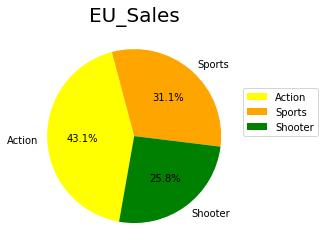

In [ ]:
EUtop3= EUtop3.reset_index ()
# print(EUtop3)
pieGenre2=EUtop3['Genre']
pieEU=EUtop3['EU_Sales']
plt.pie(pieEU, labels=pieGenre2, autopct='%.1f%%', startangle=260, counterclock=False,colors =['yellow','orange','green'])
plt.title('EU_Sales', size = 20)
plt.legend(loc = (1, 0.5))
plt.show()

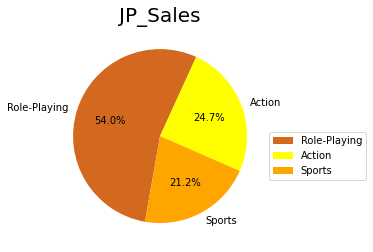

In [ ]:
JPtop3= JPtop3.reset_index ()
#print(JPtop3)
pieGenre=JPtop3['Genre']
pieJP=JPtop3['JP_Sales']
plt.pie(pieJP, labels=pieGenre, autopct='%.1f%%', startangle=260, counterclock=False, colors =['chocolate','yellow','orange'])
plt.title('JP_Sales', size = 20)
plt.legend(loc = (1, 0.3))
plt.show()

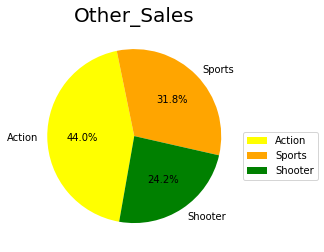

In [ ]:
Othertop3=Othertop3.reset_index ()
#print(Other_Sales)
pieGenre4=Othertop3['Genre']
pieOt=Natop3['Other_Sales']
plt.pie(pieOt, labels=pieGenre4, autopct='%.1f%%', startangle=260, counterclock=False,colors =['yellow','orange','green'])
plt.title('Other_Sales', size = 20)
plt.legend(loc = (1, 0.3))
plt.show()

지역별로 top3 장르를 뽑아냈고, top3의 퍼센티지를 비교할 수 있었다

북미는 액션, sport, shooter순으로 인기가 있음을 나타난다

유럽은 action, sports, shooter순으로 인기가 있음을 나타냈다.

일본은 Role-playing, Action, sports순으로 인기가 있었음을 나타냈다. 

다른지역에서는 action, sports, shooter순으로 인기가 있었음을 나타냈다.






#2.연도별 게임의 트렌드가 있을까?


In [ ]:
year= df['Year'].astype(int)
year=year.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,86,94,95,96,97,98],[2000,2001,2002,2003,2004,2005,2006,2007,2008, 2009, 2010,2011,2012,2013,2014,2015,2016,
                                                                      1986,1994,1995,1996,1997,1998])
#print(year)
Genre=df['Genre']
#print(Genre)

result1 = pd.concat([year,Genre],axis=1)
result1

,Year,Genre
0,2008,Action
1,2009,Action
2,2010,Adventure
3,2010,Misc
4,2010,Platform
...,...,...
16593,2006,Platform
16594,2005,Action
16595,2015,Sports
16596,2013,Action


In [ ]:
YG_crosstab= pd.crosstab(index=result1["Year"], columns=result1["Genre"])
YG_crosstab

#YG_crosstab에서 그래프의 문제점을 알아냈다 
#Year에서 0~16,86,94,95,96,97,98로 나타나는 문제 발생!-> 다시 올라가 replace로 0~16 -> 200년대도로 숫자 변경, 86,94~98 -> 1900년대로 숫자변경도와줬음 

Genre,0,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,,
1980,1,1,0,1,4,0,0,0,0,2,0,0,0
1981,0,25,0,0,0,3,2,1,0,10,1,4,0
1982,0,18,0,0,1,5,3,2,0,5,0,2,0
1983,0,7,1,0,1,5,1,0,0,1,0,1,0
1984,0,1,0,0,1,1,3,3,0,3,0,2,0
1985,0,2,0,1,0,4,4,0,0,1,1,1,0
1986,0,6,0,0,0,6,0,1,1,4,0,3,0
1987,0,2,1,2,0,2,0,0,3,2,0,4,0
1988,0,2,0,0,0,4,1,1,3,1,1,2,0


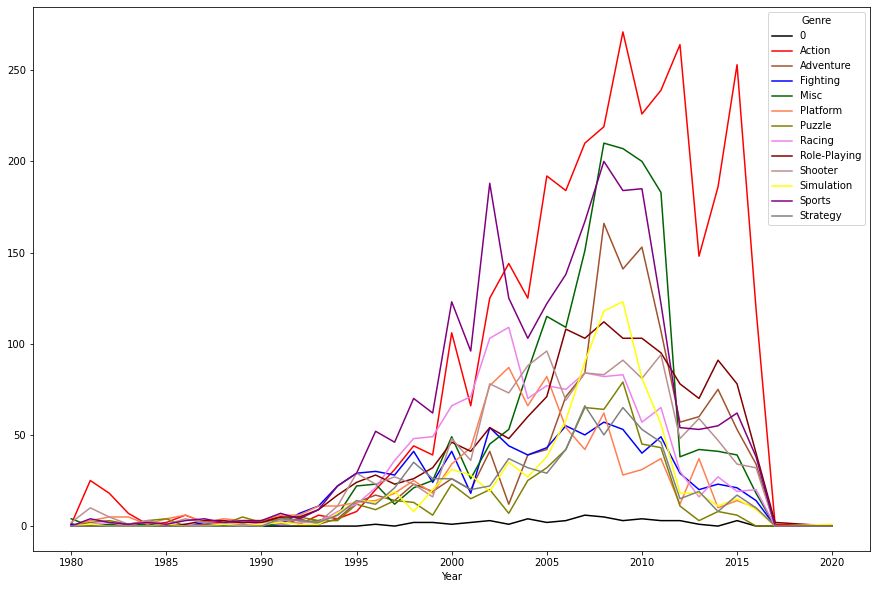

In [ ]:

YG_crosstab.plot(figsize=(15,10),color=['black','red','sienna','blue','darkgreen','coral','olive','violet',
                                       'maroon','rosybrown','yellow','purple','gray'])
#Action과 sports색 차이가 어려움 

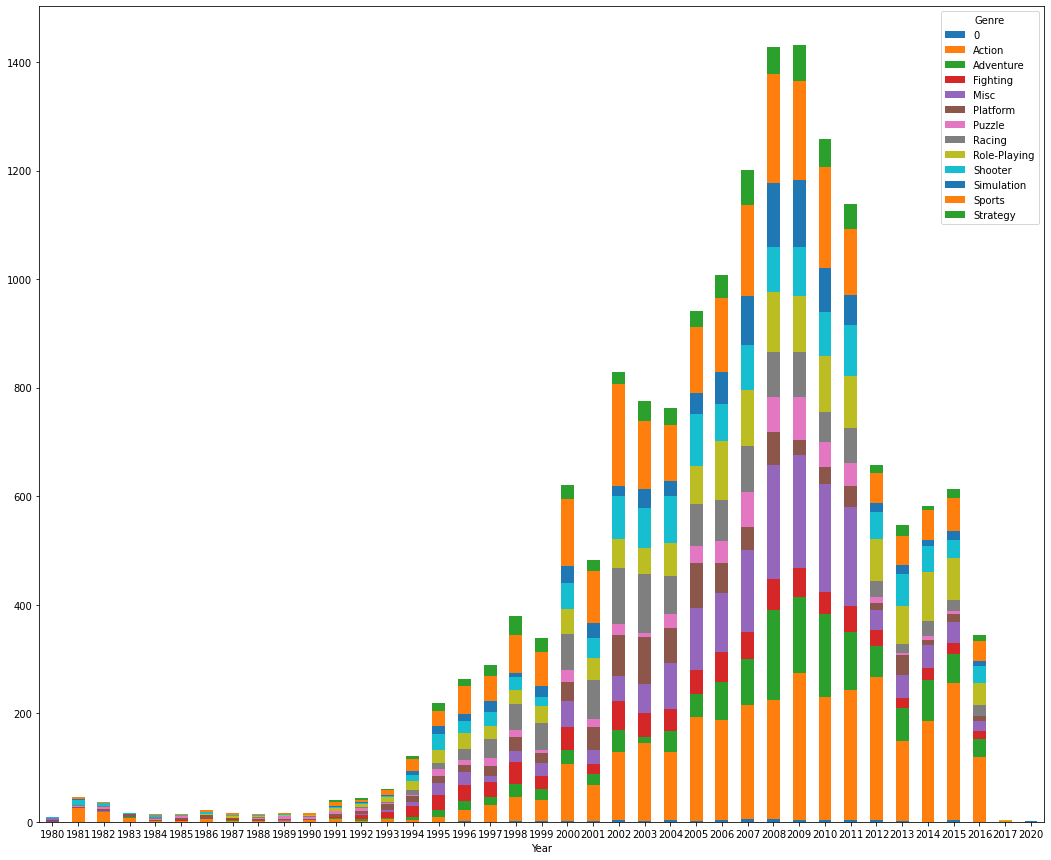

In [ ]:
barplot = YG_crosstab.plot.bar(stacked=True,
rot=0,
    figsize=(18,15))

barplot

연도별 게임 트랜드를 보면 1995~2000시기에는 sport,
2005년에는 action이 역전하여 1위를 유지중이다.


연도별 게임트랜드가 항상 바뀐다는 것을 알 수 있다.

게임산업이 활성화된 것은 2000년부터이고,  
게임산업의 호황기는 2010년임을 그래프로 볼 수 있다.

#3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함?

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [ ]:
sortdf = df.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale

,Name,Year,Genre,Total_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.83
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.38
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.01
8,New Super Mario Bros. Wii,2009.0,Platform,28.61
9,Duck Hunt,1984.0,Shooter,28.31


Text(0.5, 1.0, 'NA Sales')

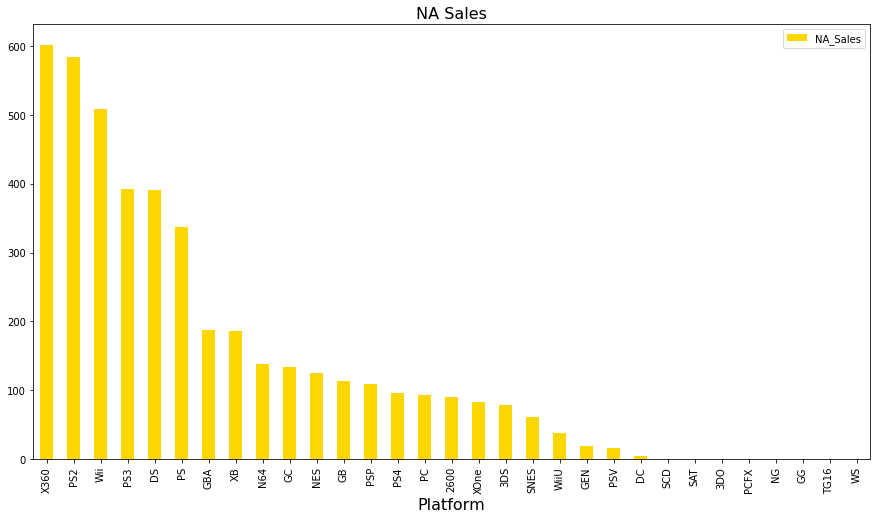

In [ ]:
p_1=pd.pivot_table(df, values='NA_Sales', index='Platform', aggfunc=np.sum).fillna(0)
p_2=pd.pivot_table(df, values='EU_Sales', index='Platform', aggfunc=np.sum).fillna(0)
p_3=pd.pivot_table(df, values='JP_Sales', index='Platform', aggfunc=np.sum).fillna(0)
p_4=pd.pivot_table(df, values='Other_Sales', index='Platform', aggfunc=np.sum).fillna(0)

plat1=p_1.sort_values(by=['NA_Sales'], axis=0, ascending=False)
plat2=p_2.sort_values(by=['EU_Sales'], axis=0, ascending=False)
plat3=p_3.sort_values(by=['JP_Sales'], axis=0, ascending=False)
plat4=p_4.sort_values(by=['Other_Sales'], axis=0, ascending=False)

plat1.plot(kind='bar',figsize=(15,8), color=['gold'])
plt.xlabel('Platform',fontsize=16)
plt.title('NA Sales',fontsize=16)

Text(0.5, 1.0, 'EU Sales')

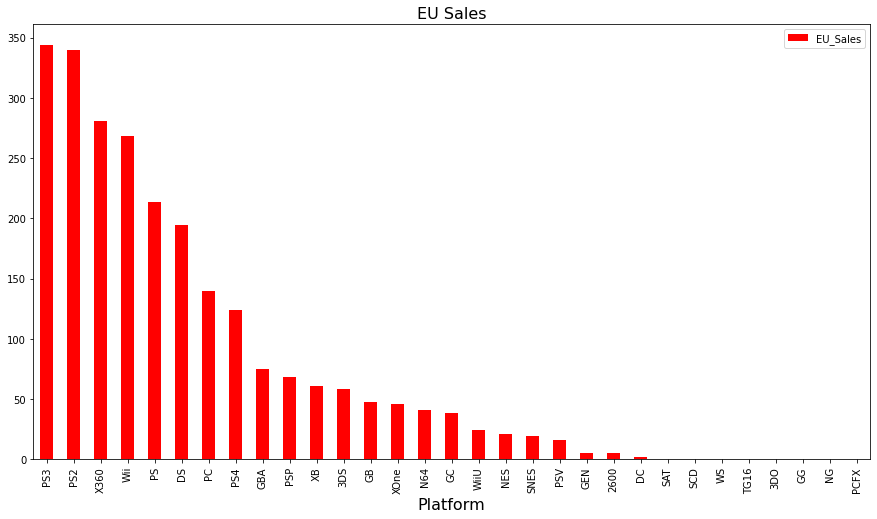

In [ ]:
plat2.plot(kind='bar',figsize=(15,8), color=['red'])
plt.xlabel('Platform',fontsize=16)
plt.title('EU Sales',fontsize=16)

Text(0.5, 1.0, 'JP Sales')

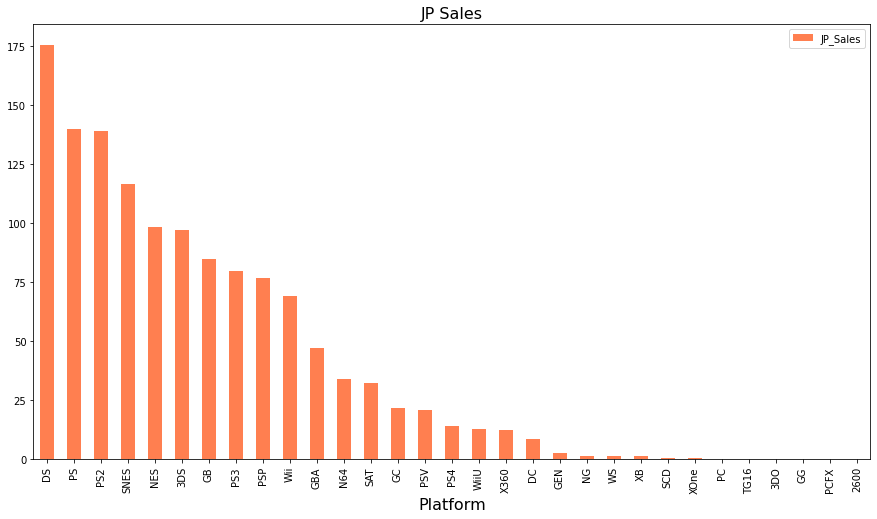

In [ ]:
plat3.plot(kind='bar',figsize=(15,8), color=['coral'])
plt.xlabel('Platform',fontsize=16)
plt.title('JP Sales',fontsize=16)

Text(0.5, 1.0, 'Other Sales')

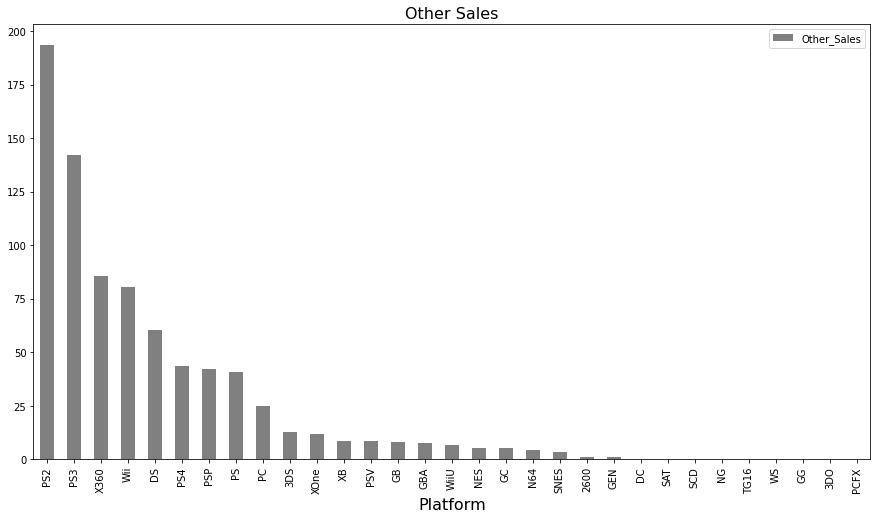

In [ ]:
plat4.plot(kind='bar',figsize=(15,8), color=['gray'])
plt.xlabel('Platform',fontsize=16)
plt.title('Other Sales',fontsize=16)

장르에 따라 출고량이 높은 게임은 지역에 따라 선호하는 게임 장르가 다를까라는 질문에서 했던 답과 같이

북미지역에서는 엑션, 스포츠, shooter

유럽지역에서는 액션,스포츠, shooter

일본지역에서는 Role-playing, 액션, 스포츠

기타지역에서는 액션, 스포츠, shooter 순으로 나타났다는것을 알 수 있었습니다.


-> 지역들에서 공통적으로 좋아하는 게임은 액션,스포츠라는 것을 알 수 있습니다.


---


Total_Sales 총 매출로 보면 Wii Sports인	Sports장르가	82.74로 많이 팔렸음을 알 수 있다. 

하지만 지역별 타겟팅으로 가게된다면 1번의 답과 같이 연결하여서 결론을 지어진다면?  액션,스포츠장르를 낸다고 한다면 

북미 -X360, PS2,/ Wii

유럽 -PS3, PS2,/ X360

일본  -DS /PS PS2

기타지역 -PS2, PS3, X360, wii 

플랫폼 top3의 상위권에 항상 속해있는 PS2 플랫폼을 이용하여 게임을 출시해야한다. 

---

----

총 결론:

전 지역 타겟팅을 한다면 sport 장르, PS2  
북미 Action장르 ,X360플랫폼 이용

유럽 Action장르, PS3플랫폼 이용

기타 Action장르, PS2

일본 Role-playing, DS